***
# <font color=blue size=10>Exercícios</font>
***

## Exercícios Estatística

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios mais atual que a utilizada em nossos experimentos.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.



# <font color=blue>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [8]:
df = pd.read_csv('pnad.pes_2015.csv', sep='\t')
df = df.fillna(0)

### Visualize o conteúdo do DataFrame

In [10]:
df

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V3629,V3630,V3631,V3632,V3633,V3634,V3637,V3638,V9993,domicilioid
0,2015,11,11000015,1,1,2,27,2,1992,23,...,0.0,0.0,0.0,1.0,0.0,1.0,333.0,634.0,20170511,11000015001
1,2015,11,11000015,3,1,4,4,5,1992,23,...,0.0,2.0,0.0,1.0,0.0,2.0,333.0,470.0,20170511,11000015003
2,2015,11,11000015,4,1,4,4,1,1980,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170511,11000015004
3,2015,11,11000015,4,2,2,5,6,1981,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170511,11000015004
4,2015,11,11000015,4,3,4,8,4,2004,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170511,11000015004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356899,2015,53,53002148,17,1,2,21,12,1976,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170511,53002148017
356900,2015,53,53002148,17,2,4,31,7,1976,39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170511,53002148017
356901,2015,53,53002148,17,3,4,9,11,1997,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170511,53002148017
356902,2015,53,53002148,17,4,4,18,6,2000,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170511,53002148017


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [13]:
salario_minimo = 788.00

faixas_renda = [
    (0, 2 * salario_minimo),  # Classe E
    (2 * salario_minimo, 5 * salario_minimo),  # Classe D
    (5 * salario_minimo, 15 * salario_minimo),  # Classe C
    (15 * salario_minimo, 25 * salario_minimo),  # Classe B
    (25 * salario_minimo, float('inf'))  # Classe A
]

### 2º Definir os labels das classes

In [15]:
labels = ['E (Até 2 SM)', 'D (De 2 a 5 SM)', 'C (De 5 a 15 SM)', 'B (De 15 a 25 SM)', 'A (Acima de 25 SM)']

df['renda'] = df[['V9532', 'V9982', 'V1022', 'V1255', 'V1252', 'V1261', 'V1264', 'V1267', 'V1270', 'V1273']].sum(axis=1)

df['classe'] = pd.cut(df['renda'], bins=[0] + [interval[1] for interval in faixas_renda], labels=labels, right=False)

### 3º Construir a coluna de frequências

In [17]:
frequencia = df['classe'].value_counts().sort_index()

### 4º Construir a coluna de percentuais

In [19]:
percentual = (frequencia / frequencia.sum()) * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [21]:
tabela_frequencia = pd.DataFrame({'frequencia': frequencia, 'percentual': percentual})

tabela_frequencia

,frequencia,percentual
classe,,
E (Até 2 SM),292378,81.920629
D (De 2 a 5 SM),47002,13.169368
C (De 5 a 15 SM),15054,4.217941
B (De 15 a 25 SM),1657,0.464271
A (Acima de 25 SM),813,0.227792


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

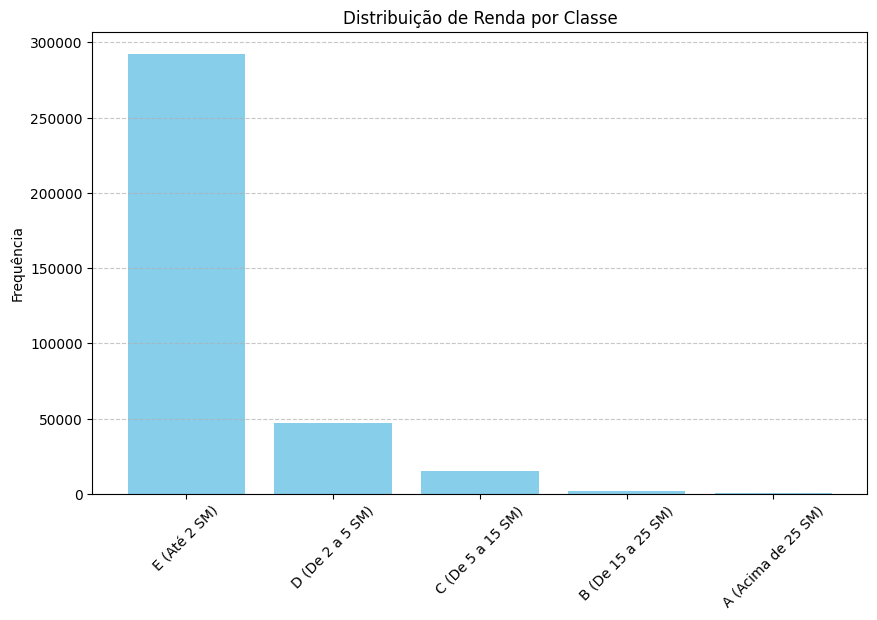

In [23]:
# Construir o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tabela_frequencia.index, tabela_frequencia['frequencia'], color='skyblue')
plt.ylabel('Frequência')
plt.title('Distribuição de Renda por Classe')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

> ### Conclusões

Os dados mostram que a maior parte da população está concentrada nas classes de renda mais baixas. Cerca de 82% das pessoas estão na classe E (até 2 salários mínimos), e 13% na classe D (de 2 a 5 SM), somando 95% abaixo de 5 salários mínimos. As classes de renda média e alta são muito menos representadas, com apenas 4% na classe C (de 5 a 15 SM) e menos de 1% nas classes B (de 15 a 25 SM) e A (acima de 25 SM). Essa distribuição revela uma grande desigualdade econômica, onde a maioria vive com pouca renda e uma pequena parcela da população alcança níveis mais altos, o que indica a necessidade de políticas públicas para reduzir essa disparidade social.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

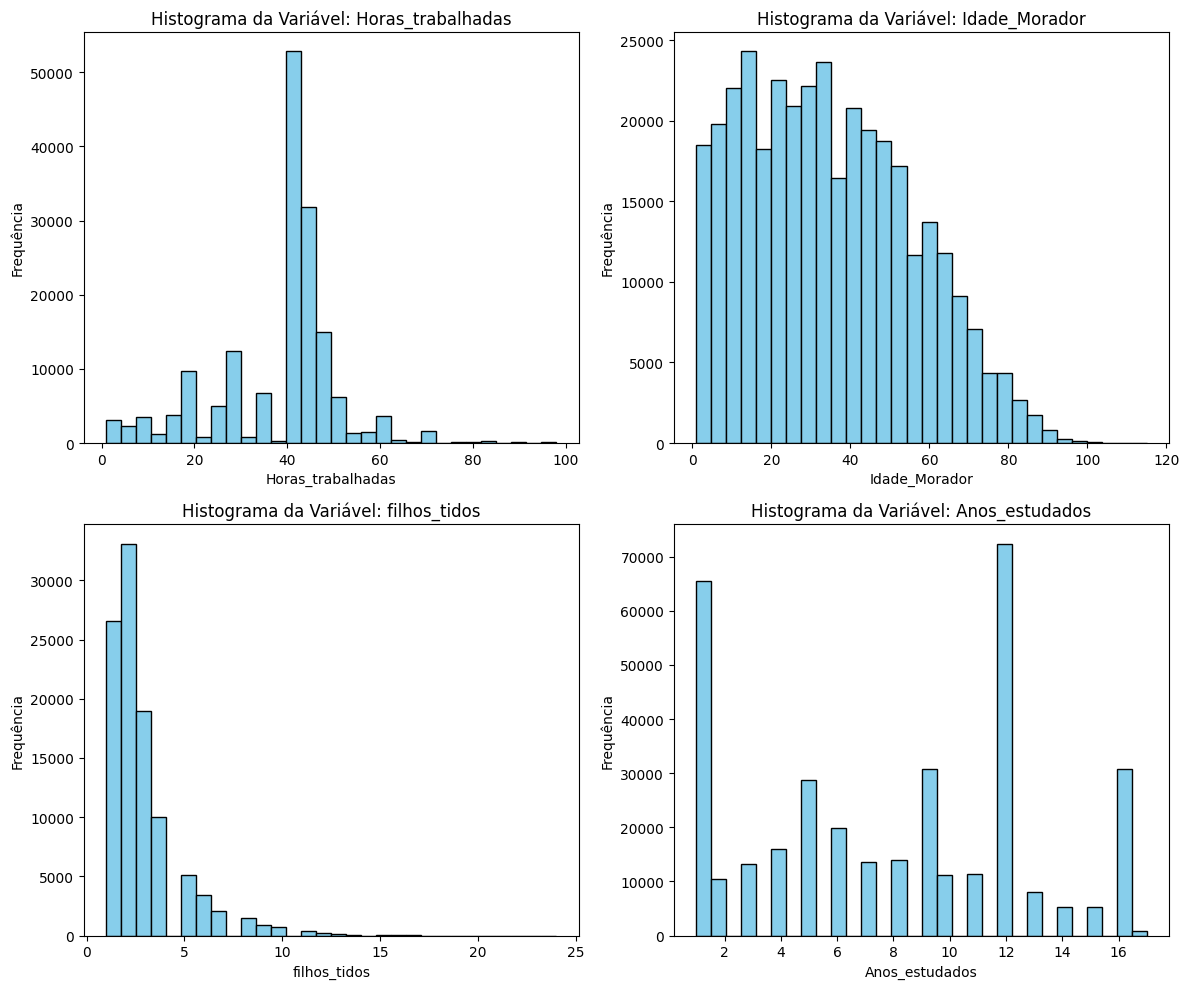

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df['filhos_tidos'] = df[['V1141', 'V1142', 'V1151', 'V1152']].sum(axis=1)

df = df.rename(columns={'V9058': 'Horas_trabalhadas', 'V8005': 'Idade_Morador', 'V4803': 'Anos_estudados'})

colunas = ['Horas_trabalhadas', 'Idade_Morador', 'filhos_tidos', 'Anos_estudados']
df_filtrado = df[colunas][df[colunas] > 0]

plt.figure(figsize=(12, 10))
for i, coluna in enumerate(df_filtrado.columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df_filtrado[coluna].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma da Variável: {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


> ### Conclusões

Horas trabalhadas:
No Brasil, a maioria das pessoas trabalha entre 40 e 60 horas por semana. Essa rotina, infelizmente, nem sempre vem acompanhada de uma remuneração justa, como pudemos concluir no gráfico da renda populacional, o que acaba sobrecarregando o trabalhador e deixando pouco espaço para descanso ou lazer. Isso impacta a vida pessoal e pode gerar um desgaste emocional.

Idade da população: maioria adulta e envelhecimento
Quando olhamos o histograma da idade da população, vemos que a maioria das pessoas está na faixa adulta, com muitos já entre os 20 e 50 anos. Isso indica que o Brasil tem uma grande população produtiva, que está no auge de suas carreiras, mas também é um reflexo do envelhecimento da população. A taxa de natalidade tem caído ao longo das décadas, e a expectativa de vida aumentou.

Família no Brasil: 1 a 5 filhos
A maioria das brasileiras tem entre 1 e 5 filhos. Esse padrão está mudando ao longo dos anos, e a tendência é que o número de filhos por família continue diminuindo, por inúmeros motivos como, por exemplo, questões econômicas.

Educação: a maioria estuda poucos anos ou 12 anos
A maior parte da população brasileira tem um nível de escolaridade que se concentra em dois grupos: ou estudaram poucos anos (muitas vezes não completando o ensino fundamental), ou alcançaram 12 anos de estudo, que é o equivalente ao ensino médio completo. Essa grande diferença reflete a desigualdade educacional no Brasil: enquanto muitos conseguem concluir os estudos, uma parte significativa da população ainda tem acesso limitado a uma educação de qualidade, o que acaba criando um abismo entre os mais escolarizados e os menos escolarizados. E poucas pessoas ainda estudaram além do ensino médio.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

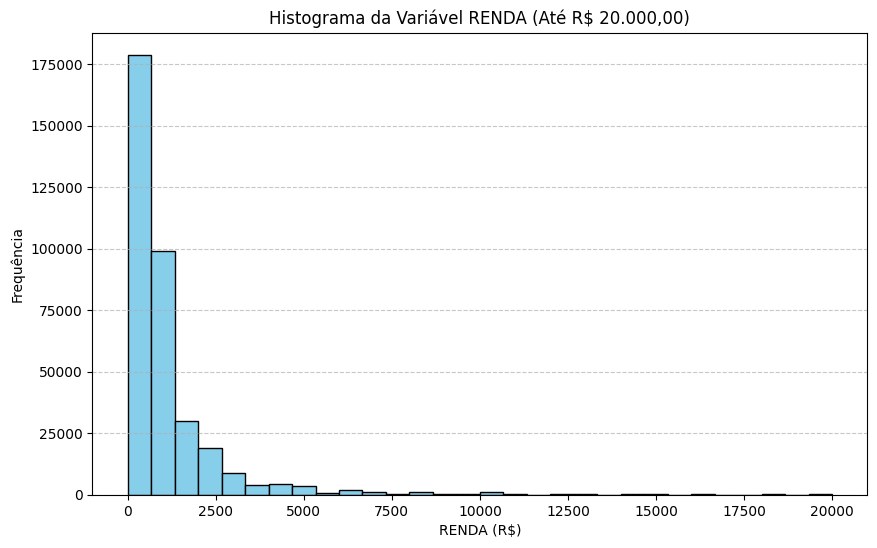

In [29]:
# Filtrar os dados com RENDA até R$ 20.000,00
df_filtrado = df[df['renda'] <= 20000]

# Plotar o histograma para a variável RENDA
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['renda'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da Variável RENDA (Até R$ 20.000,00)')
plt.xlabel('RENDA (R$)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [31]:
df = df.rename(columns={'V0302': 'sexo'})
df['sexo'] = df['sexo'].map({2: 'Masculino', 4: 'Feminino'})

df = df.rename(columns={'V0404': 'cor'})
df['cor'] = df['cor'].map({
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    0: 'Indígena',
    9: 'Sem declaração'
})

df['Anos_estudados'] = df['Anos_estudados'].map({
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
})

df['UF'] = df['UF'].map({
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
})


In [32]:
tabela_frequencias = pd.crosstab(df['sexo'], df['cor'])

# Tabela de percentuais
tabela_percentuais = pd.crosstab(df['sexo'], df['cor'], normalize='all') * 100

# Exibindo os resultados
print("Tabela de Frequências:")
print(tabela_frequencias)

print("\nTabela de Percentuais:")
print(tabela_percentuais)

Tabela de Frequências:
cor        Amarela  Branca  Indígena  Parda  Preta
sexo                                              
Feminino       724   78710       829  86802  16616
Masculino      636   70202       813  85022  16550

Tabela de Percentuais:
cor         Amarela     Branca  Indígena      Parda     Preta
sexo                                                         
Feminino   0.202856  22.053549  0.232275  24.320826  4.655594
Masculino  0.178199  19.669715  0.227792  23.822092  4.637101


> ### Conclusões

As tabelas de frequências e percentuais revelam algumas características sobre a distribuição de cor ou raça entre homens e mulheres. Em termos absolutos, tanto as mulheres quanto os homens se identificam majoritariamente como Brancos e Pardos, com as mulheres tendo um número ligeiramente maior de indivíduos em ambas as categorias. As categorias Amarela e Indígena são bem pequenas em ambas as populações, com menos de 1% de participação, refletindo a minoria dessas identidades na população brasileira. No geral, a distribuição por cor ou raça entre os sexos segue um padrão bastante semelhante, mas com as mulheres apresentando números absolutos ligeiramente mais elevados em todas as categorias, o que faz sentido, uma vez que são a maioria da população brasileira.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [36]:
media = df['renda'].mean()
print(f"Média aritmética: {media}")


Média aritmética: 1032.9983665075201


### Obtenha a mediana

In [38]:
mediana = df['renda'].median()
print(f"Mediana: {mediana}")


Mediana: 650.0


### Obtenha a moda

In [40]:
moda = df['renda'].mode()
print(f"Moda: {moda}")


Moda: 0    0.0
Name: renda, dtype: float64


### Obtenha o desvio médio absoluto

In [42]:
desvio_medio_absoluto = (df['renda'] - mediana).abs().mean()

print(f"Desvio Médio Absoluto: {desvio_medio_absoluto}")


Desvio Médio Absoluto: 971.8846496536884


### Obtenha a variância

In [44]:
variancia = df['renda'].var()
print(f"Variância: {variancia}")


Variância: 5217676.397460617


### Obtenha o desvio-padrão

In [46]:
desvio_padrao = df['renda'].std()
print(f"Desvio-Padrão: {desvio_padrao}")


Desvio-Padrão: 2284.2233685567217


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [48]:
import pandas as pd

agg_funcs = ['mean', 'median', 'max']

tabela_renda_sexo_cor = pd.crosstab(
    index=[df['sexo'], df['cor']], 
    columns='dummy',  
    values=df['renda'],  
    aggfunc=agg_funcs  
)

print(tabela_renda_sexo_cor)


                           mean  median       max
col_0                     dummy   dummy     dummy
sexo      cor                                    
Feminino  Amarela   1669.243094   788.0   28800.0
          Branca    1074.895579   600.0  114000.0
          Indígena   701.665862    80.0  120000.0
          Parda      595.845960   149.0   60000.0
          Preta      690.684340   500.0   24217.0
Masculino Amarela   3018.394654  1448.0   50000.0
          Branca    1698.546537   800.0  200000.0
          Indígena   743.018450   120.0   28000.0
          Parda      941.332702   780.0  100000.0
          Preta     1044.703746   788.0   50000.0


> ### Conclusões

A tabela de rendas revela algumas diferenças notáveis entre os sexos e as cores ou raças. As mulheres apresentam rendas médias mais baixas em comparação com os homens, independentemente da cor. As mulheres amarelas têm a maior média de renda entre as mulheres, seguido pelas brancas. No entanto, as mulheres pretas, pardas e indígenas têm rendas consideravelmente mais baixas. Quando olhamos para os homens, as rendas médias são mais altas em todas as categorias, com os homens brancos recebendo, em média, bem mais do que as mulheres dessa mesma cor, e os homens amarelos apresentando uma média ainda mais alta. A diferença é ainda mais visível nos valores máximos de renda, onde os homens brancos atingem rendimentos significativamente maiores do que as mulheres brancas. Isso mostra que, além da desigualdade de gênero, também existe uma grande diferença nas rendas conforme a cor, com os homens brancos e amarelos se destacando como os grupos com as maiores rendas. A disparidade de renda, portanto, não é apenas uma questão de sexo, mas também está fortemente ligada à cor ou raça, com as mulheres e as minorias étnicas apresentando as menores rendas médias.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [51]:
import pandas as pd

def mad(series):
    return (series - series.median()).abs().mean()

agg_funcs = {
    'renda': ['mean', 'median', 'max', 'var', 'std', mad]
}

tabela_dispercao_sexo_cor = df.groupby(['sexo', 'cor']).agg(agg_funcs)

print(tabela_dispercao_sexo_cor)


                          renda                                               \
                           mean  median       max           var          std   
sexo      cor                                                                  
Feminino  Amarela   1669.243094   788.0   28800.0  9.014888e+06  3002.480335   
          Branca    1074.895579   600.0  114000.0  5.096689e+06  2257.584774   
          Indígena   701.665862    80.0  120000.0  1.874354e+07  4329.381171   
          Parda      595.845960   149.0   60000.0  1.365513e+06  1168.551764   
          Preta      690.684340   500.0   24217.0  1.150764e+06  1072.736858   
Masculino Amarela   3018.394654  1448.0   50000.0  2.527568e+07  5027.492273   
          Branca    1698.546537   800.0  200000.0  1.299634e+07  3605.044353   
          Indígena   743.018450   120.0   28000.0  2.345358e+06  1531.456158   
          Parda      941.332702   780.0  100000.0  3.255740e+06  1804.366900   
          Preta     1044.703746   788.0 

> ### Conclusões

A tabela acima confirma basicamente tudo o que foi dito anteriormente a respeito das distribuições de renda por gênero e etnia na população brasileira

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

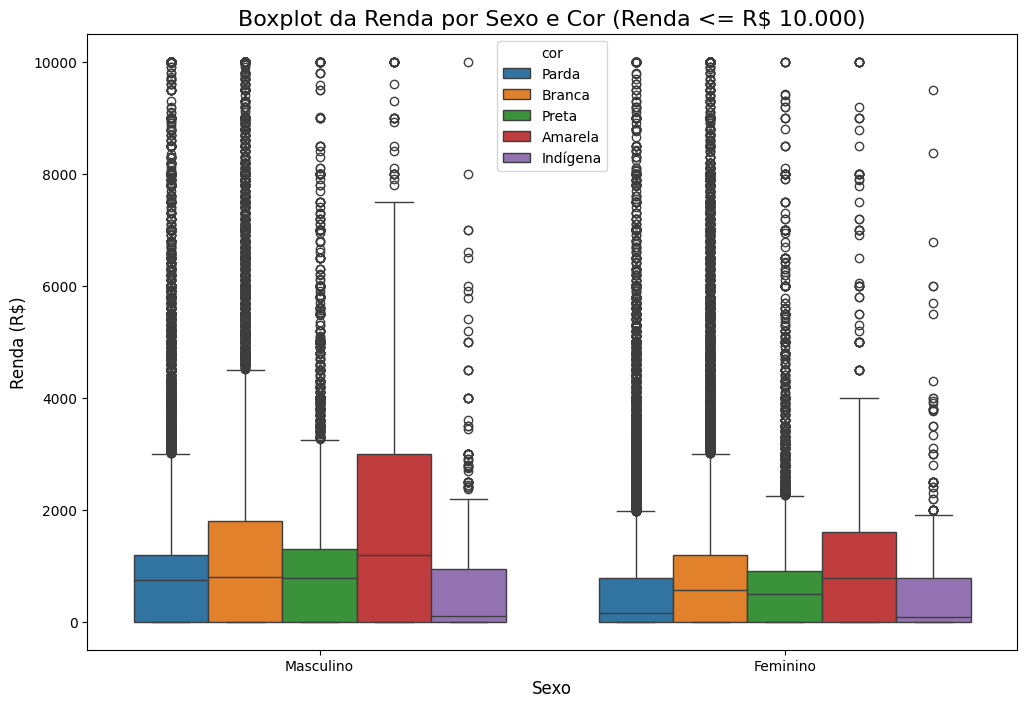

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando o dataset para pessoas com renda abaixo de R$ 10.000
df_filtrado = df[df['renda'] <= 10000]

# Construindo o boxplot com 'sexo' no eixo x e 'renda' no eixo y, segmentado por 'cor'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtrado, x='sexo', y='renda', hue='cor')

# Adicionando título e rótulos
plt.title('Boxplot da Renda por Sexo e Cor (Renda <= R$ 10.000)', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)

# Exibindo o gráfico
plt.show()


> ### Conclusões

Mesmo que o valor máximo de renda estipulado tenha sido 10 mil reais, ainda assim, os gráficos de boxplot refletem basicamente a mesma coisa vista na tabela anterior, onde os homens ganham mais que as mulheres e os brancos e amarelos também possuem uma renda maior.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [57]:
from scipy.stats import percentileofscore

percentual_ate_salario_minimo = percentileofscore(df['renda'], salario_minimo, kind='weak')

print(f"Percentual de pessoas que ganham até um salário mínimo (R$ 788,00): {percentual_ate_salario_minimo:.2f}%")

Percentual de pessoas que ganham até um salário mínimo (R$ 788,00): 62.40%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [59]:
quantil_99 = df['renda'].quantile(0.99)

print(f"O valor máximo ganho por 99% das pessoas do dataset é: R$ {quantil_99:.2f}")

O valor máximo ganho por 99% das pessoas do dataset é: R$ 10000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [61]:
import pandas as pd

agg_funcs = ['mean', 'median', 'max', 'std']

tabela_estudo_sexo = pd.crosstab(
    index=[df['Anos_estudados'], df['sexo']],  
    columns='dummy', 
    values=df['renda'], 
    aggfunc=agg_funcs
)

print(tabela_estudo_sexo)


                                                 mean  median       max  \
col_0                                           dummy   dummy     dummy   
Anos_estudados                 sexo                                       
1 ano                          Feminino    284.174019     0.0   15000.0   
                               Masculino   387.911754     0.0   30000.0   
10 anos                        Feminino    416.383483    50.0   10000.0   
                               Masculino   955.337302   788.0   80000.0   
11 anos                        Feminino    872.226244   788.0  114000.0   
                               Masculino  1647.666974  1200.0  200000.0   
12 anos                        Feminino   1016.723520   788.0  120000.0   
                               Masculino  1667.931460  1200.0   30000.0   
13 anos                        Feminino   1172.237443   800.0   35000.0   
                               Masculino  2016.340775  1320.0   25000.0   
14 anos                  

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

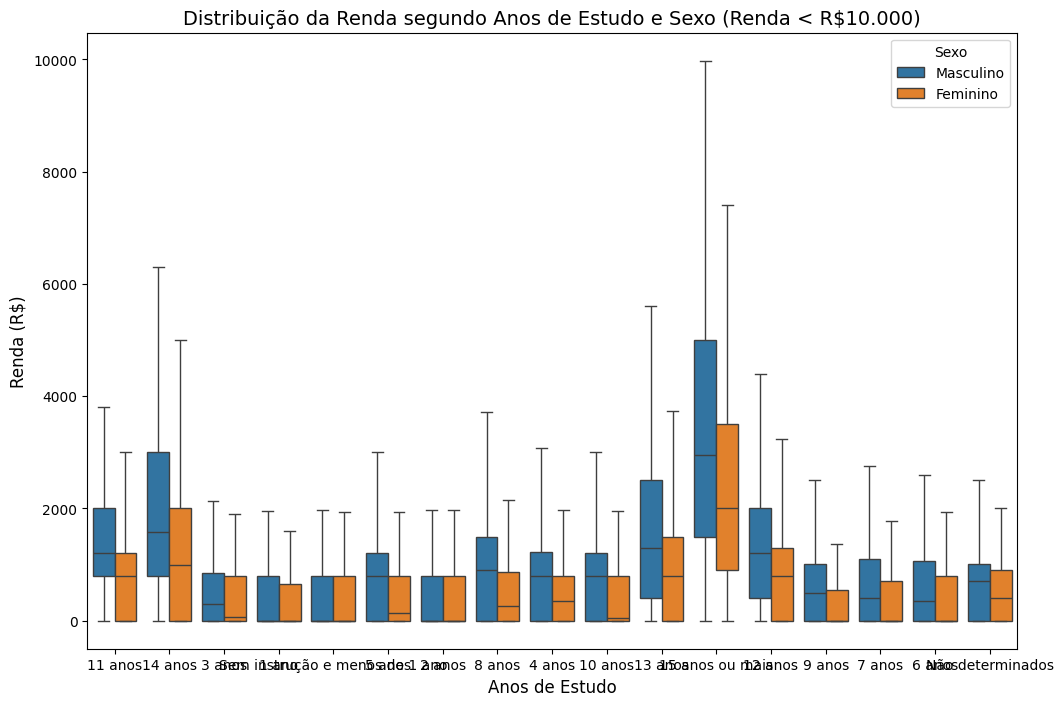

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_filtrados = df.query('renda < 10000')

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Anos_estudados', y='renda', hue='sexo', 
    data=dados_filtrados, 
    showfliers=False 
)

plt.title('Distribuição da Renda segundo Anos de Estudo e Sexo (Renda < R$10.000)', fontsize=14)
plt.xlabel('Anos de Estudo', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)
plt.legend(title='Sexo')

plt.show()


> ### Conclusões

É possível observar que, em média, as pessoas com maior nível de escolaridade também são aquelas que possuem os melhores salários, e que a maioria das pessoas com bons salários são do sexo masculino

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [66]:
# Agrupando por UNIDADE DA FEDERAÇÃO e calculando as estatísticas desejadas
estatisticas_renda_uf = df.groupby('UF')['renda'].agg(
    mean='mean',
    median='median',
    max='max',
    std='std'
).reset_index()

# Exibindo a tabela de resultados
print(estatisticas_renda_uf)


                     UF         mean  median       max          std
0                  Acre   695.877037   112.0   31300.0  1652.354724
1               Alagoas   566.718962   155.5   19600.0  1019.180998
2                 Amapá   748.978868   140.0   15580.0  1394.516738
3              Amazonas   672.921196     0.0   60000.0  1464.869946
4                 Bahia   777.383292   390.0  200000.0  2057.257570
5                 Ceará   667.551995   297.0   30000.0  1339.994087
6      Distrito Federal  2137.268249   800.0  100000.0  4106.616023
7        Espírito Santo  1049.134896   788.0  100000.0  2230.231785
8                 Goiás  1036.457316   788.0   80000.0  1867.029096
9              Maranhão   558.851751   112.0   31000.0  1416.170216
10          Mato Grosso  1056.777585   788.0   35000.0  1852.484073
11   Mato Grosso do Sul  1230.916916   788.0   43100.0  2312.065101
12         Minas Gerais  1123.762882   788.0  108849.0  2453.780513
13               Paraná  1290.720586   788.0  20

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

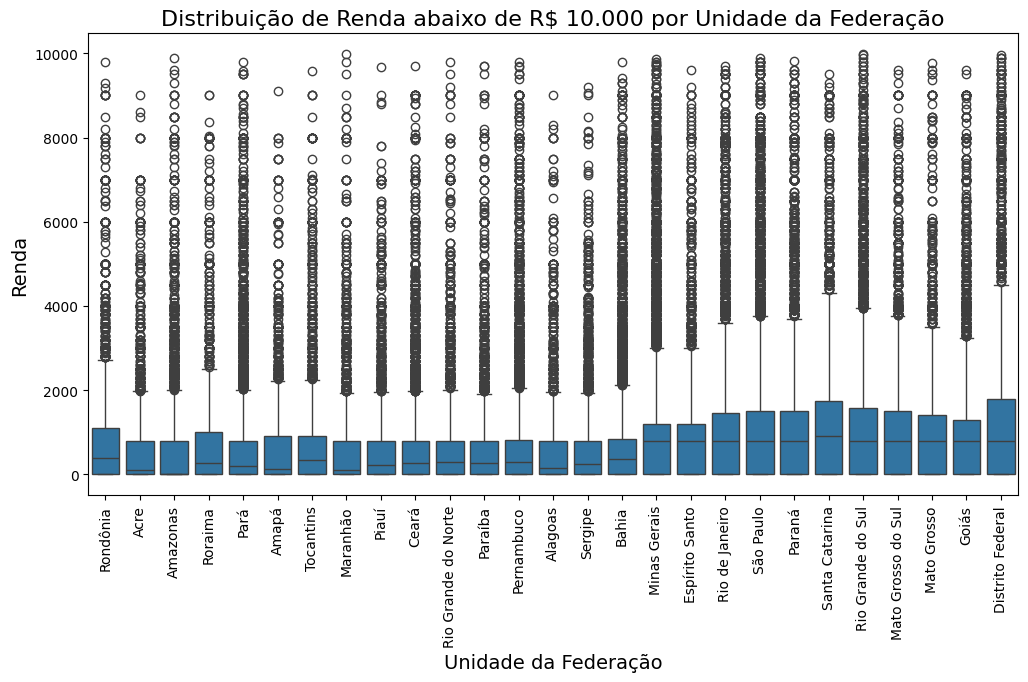

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_filtrados = df[df['renda'] < 10000]

plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_filtrados, x='UF', y='renda')

plt.title('Distribuição de Renda abaixo de R$ 10.000 por Unidade da Federação', fontsize=16)
plt.xlabel('Unidade da Federação', fontsize=14)
plt.ylabel('Renda', fontsize=14)

plt.xticks(rotation=90) 
plt.show()


> ### Conclusões

Os estados do norte e nordeste possuem em média uma renda menor do que os estados do sul, sudeste e centro-oeste.